In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.spatial.distance import squareform
import scipy.cluster.hierarchy as sch #might be obsolete
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import confusion_matrix
from function_pontius import *
%matplotlib inline

C:\Users\chimp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        #plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('Sample Index or (Cluster Size)',  fontsize=16)
        #plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [45]:
### Load Results ###
# Shannon
dist_shan = pd.read_csv('E:/thesis_data/Output_DFs/shannon_df.csv')
shan_vals = pd.read_csv('E:/thesis_data/Output_DFs/shannon_values.csv')
# Simpsons
dist_simp = pd.read_csv('E:/thesis_data/Output_DFs/simp_df.csv')
vals_simp = pd.read_csv('E:/thesis_data/Output_DFs/simp_values.csv')
# Kappa
kappa_df = pd.read_csv('E:/thesis_data/Output_DFs/kappa.csv', index_col= 'Unnamed: 0')
dist_kappa = 1 - kappa_df
# OA
oa_df = pd.read_csv('E:/thesis_data/Output_DFs/overallaccuracy_df.csv')
dist_oa = 1 - oa_df
# OAD
oad_df = pd.read_csv('E:/thesis_data/Output_DFs/overallallocationdifference_df.csv')
np.fill_diagonal(oad_df.values, 0)
# OD
od_df = pd.read_csv('E:/thesis_data/Output_DFs/overalldifference_df.csv')
np.fill_diagonal(od_df.values, 0)
# OQD
oqd_df = pd.read_csv('E:/thesis_data/Output_DFs/overallquantitydifference_df.csv')
np.fill_diagonal(oqd_df.values, 0)
# OQD_22
qd22_df = pd.read_csv('E:/thesis_data/Output_DFs/quantitydifferencecategorical_22_df.csv')
np.fill_diagonal(qd22_df.values, 0)
# TCA [nature]
dist_tca = pd.read_csv('E:/thesis_data/Output_DFs/Total Class Area[class 22]_df.csv')
vals_tca = pd.read_csv('E:/thesis_data/Output_DFs/Total Class Area[class 22]_values.csv')
# PLAND [nature]
dist_pland = pd.read_csv('E:/thesis_data/Output_DFs/PLAND[class 22]_df.csv')
vals_pland =  pd.read_csv('E:/thesis_data/Output_DFs/PLAND[class 22]_values.csv')

In [50]:
dist_oa.head(10)

,map0,map1,map2,map3,map4,map5,map6,map7,map8,map9,...,map1990,map1991,map1992,map1993,map1994,map1995,map1996,map1997,map1998,map1999
0,0.000,0.062,0.050,0.059,0.053,0.047,0.056,0.048,0.050,0.058,...,0.038,0.065,0.038,0.029,0.061,0.048,0.055,0.037,0.037,0.060
1,0.062,0.000,0.049,0.029,0.020,0.036,0.033,0.050,0.071,0.035,...,0.070,0.031,0.061,0.065,0.039,0.044,0.057,0.075,0.046,0.037
2,0.050,0.049,0.000,0.046,0.043,0.030,0.042,0.018,0.058,0.042,...,0.066,0.047,0.050,0.048,0.034,0.021,0.043,0.059,0.046,0.041
3,0.059,0.029,0.046,0.000,0.028,0.024,0.020,0.048,0.058,0.017,...,0.051,0.024,0.058,0.065,0.042,0.034,0.044,0.069,0.047,0.033
4,0.053,0.020,0.043,0.028,0.000,0.034,0.028,0.043,0.069,0.031,...,0.070,0.026,0.057,0.062,0.029,0.039,0.052,0.074,0.038,0.034
5,0.047,0.036,0.030,0.024,0.034,0.000,0.030,0.032,0.052,0.030,...,0.044,0.035,0.045,0.055,0.045,0.019,0.038,0.058,0.038,0.041
6,0.056,0.033,0.042,0.020,0.028,0.030,0.000,0.044,0.052,0.009,...,0.054,0.010,0.059,0.061,0.035,0.030,0.035,0.064,0.052,0.025
7,0.048,0.050,0.018,0.048,0.043,0.032,0.044,0.000,0.059,0.044,...,0.067,0.049,0.040,0.035,0.023,0.025,0.046,0.065,0.044,0.046
8,0.050,0.071,0.058,0.058,0.069,0.052,0.052,0.059,0.000,0.057,...,0.042,0.061,0.046,0.052,0.068,0.044,0.033,0.058,0.067,0.067
9,0.058,0.035,0.042,0.017,0.031,0.030,0.009,0.044,0.057,0.000,...,0.056,0.009,0.061,0.064,0.036,0.029,0.040,0.065,0.052,0.025


In [51]:
od_df.head(10)

,map0,map1,map2,map3,map4,map5,map6,map7,map8,map9,...,map1990,map1991,map1992,map1993,map1994,map1995,map1996,map1997,map1998,map1999
0,0.0,231259.0,184870.0,218527.0,194858.0,173362.0,209302.0,178205.0,184472.0,215016.0,...,142342.0,239492.0,139259.0,107605.0,224591.0,176094.0,205332.0,136717.0,137030.0,223462.0
1,231259.0,0.0,181056.0,108747.0,72347.0,131721.0,123490.0,185977.0,263369.0,130189.0,...,260084.0,113157.0,224459.0,242033.0,143602.0,163277.0,210055.0,276261.0,170608.0,136233.0
2,184870.0,181056.0,0.0,170029.0,158581.0,110914.0,155429.0,68458.0,213956.0,154586.0,...,243229.0,175095.0,186368.0,178553.0,124799.0,79078.0,160411.0,220154.0,170096.0,150506.0
3,218527.0,108747.0,170029.0,0.0,103546.0,87946.0,73912.0,176158.0,213975.0,64390.0,...,189281.0,87500.0,214441.0,241716.0,153969.0,127318.0,162098.0,254499.0,172299.0,122987.0
4,194858.0,72347.0,158581.0,103546.0,0.0,124252.0,103969.0,157704.0,254586.0,115644.0,...,259922.0,97741.0,210991.0,228330.0,107992.0,143141.0,192501.0,272761.0,141220.0,127239.0
5,173362.0,131721.0,110914.0,87946.0,124252.0,0.0,109566.0,117765.0,194256.0,110546.0,...,162970.0,130936.0,165233.0,204541.0,166143.0,70471.0,140659.0,213957.0,141859.0,150525.0
6,209302.0,123490.0,155429.0,73912.0,103969.0,109566.0,0.0,162471.0,193556.0,31784.0,...,200958.0,38279.0,220431.0,227173.0,131344.0,110111.0,130495.0,235554.0,191373.0,93136.0
7,178205.0,185977.0,68458.0,176158.0,157704.0,117765.0,162471.0,0.0,220304.0,161526.0,...,246937.0,182270.0,147754.0,127888.0,86292.0,91776.0,171941.0,240187.0,162668.0,168922.0
8,184472.0,263369.0,213956.0,213975.0,254586.0,194256.0,193556.0,220304.0,0.0,211202.0,...,154529.0,227156.0,170792.0,193468.0,252081.0,161465.0,121030.0,214635.0,247648.0,249534.0
9,215016.0,130189.0,154586.0,64390.0,115644.0,110546.0,31784.0,161526.0,211202.0,0.0,...,206535.0,34917.0,225118.0,238499.0,131858.0,108179.0,149473.0,241262.0,193768.0,90797.0


In [13]:
np.fill_diagonal(oad_df.values, 0)

In [25]:
oad_df

,map0,map1,map2,map3,map4,map5,map6,map7,map8,map9,...,map1990,map1991,map1992,map1993,map1994,map1995,map1996,map1997,map1998,map1999
0,0.0,231259.0,184870.0,218527.0,194858.0,173362.0,209302.0,178205.0,184472.0,215016.0,...,142342.0,239492.0,139259.0,107605.0,224591.0,176094.0,205332.0,136717.0,137030.0,223462.0
1,231259.0,0.0,181056.0,108747.0,72347.0,131721.0,123490.0,185977.0,263369.0,130189.0,...,260084.0,113157.0,224459.0,242033.0,143602.0,163277.0,210055.0,276261.0,170608.0,136233.0
2,184870.0,181056.0,0.0,170029.0,158581.0,110914.0,155429.0,68458.0,213956.0,154586.0,...,243229.0,175095.0,186368.0,178553.0,124799.0,79078.0,160411.0,220154.0,170096.0,150506.0
3,218527.0,108747.0,170029.0,0.0,103546.0,87946.0,73912.0,176158.0,213975.0,64390.0,...,189281.0,87500.0,214441.0,241716.0,153969.0,127318.0,162098.0,254499.0,172299.0,122987.0
4,194858.0,72347.0,158581.0,103546.0,0.0,124252.0,103969.0,157704.0,254586.0,115644.0,...,259922.0,97741.0,210991.0,228330.0,107992.0,143141.0,192501.0,272761.0,141220.0,127239.0
5,173362.0,131721.0,110914.0,87946.0,124252.0,0.0,109566.0,117765.0,194256.0,110546.0,...,162970.0,130936.0,165233.0,204541.0,166143.0,70471.0,140659.0,213957.0,141859.0,150525.0
6,209302.0,123490.0,155429.0,73912.0,103969.0,109566.0,0.0,162471.0,193556.0,31784.0,...,200958.0,38279.0,220431.0,227173.0,131344.0,110111.0,130495.0,235554.0,191373.0,93136.0
7,178205.0,185977.0,68458.0,176158.0,157704.0,117765.0,162471.0,0.0,220304.0,161526.0,...,246937.0,182270.0,147754.0,127888.0,86292.0,91776.0,171941.0,240187.0,162668.0,168922.0
8,184472.0,263369.0,213956.0,213975.0,254586.0,194256.0,193556.0,220304.0,0.0,211202.0,...,154529.0,227156.0,170792.0,193468.0,252081.0,161465.0,121030.0,214635.0,247648.0,249534.0
9,215016.0,130189.0,154586.0,64390.0,115644.0,110546.0,31784.0,161526.0,211202.0,0.0,...,206535.0,34917.0,225118.0,238499.0,131858.0,108179.0,149473.0,241262.0,193768.0,90797.0


In [11]:
shan_vals['shannon'].describe()

count    2000.000000
mean        2.426533
std         0.008863
min         2.405894
25%         2.420252
50%         2.426711
75%         2.433060
max         2.446781
Name: shannon, dtype: float64

In [12]:
unique,counts= np.unique(vals_tca['Total Class Area[class 22]'], return_counts=True)
d = dict(zip(unique, counts))
d

{665479: 1,
 665480: 109,
 665481: 58,
 665482: 101,
 665483: 397,
 690480: 16,
 690481: 212,
 690482: 132,
 690483: 162,
 690484: 122,
 690485: 23,
 721481: 171,
 721482: 21,
 721483: 295,
 721484: 180}

In [13]:
unique2,counts2= np.unique(vals_pland['PLAND[class 22]'], return_counts=True)
d2 = dict(zip(unique2, counts2))
d2

{17.96151068224046: 1,
 17.961537672589788: 109,
 17.961564662939118: 58,
 17.96159165328845: 101,
 17.96161864363778: 397,
 18.636296405857124: 16,
 18.636323396206453: 212,
 18.636350386555787: 132,
 18.636377376905113: 162,
 18.636404367254446: 122,
 18.636431357603772: 23,
 19.473024225457944: 171,
 19.47305121580728: 21,
 19.473078206156607: 295,
 19.473105196505934: 180}

In [14]:
vals_tca.describe()

,Total Class Area[class 22]
count,2000.000000
mean,692495.916500
std,22909.323746
min,665479.000000
25%,665483.000000
50%,690482.000000
75%,721481.000000
max,721484.000000


In [15]:
dist_pland.describe()

,map0,map1,map2,map3,map4,map5,map6,map7,map8,map9,...,map1990,map1991,map1992,map1993,map1994,map1995,map1996,map1997,map1998,map1999
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.729103,0.503752,0.503755,0.503752,0.729103,0.729145,0.729123,0.503755,0.782376,0.729123,...,0.782399,0.729123,0.503755,0.503750,0.503749,0.729145,0.782399,0.782362,0.782399,0.503752
std,0.618313,0.362490,0.362474,0.362490,0.618313,0.618327,0.618322,0.362474,0.618325,0.618322,...,0.618331,0.618322,0.362474,0.362485,0.362490,0.618327,0.618331,0.618308,0.618331,0.362490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000054,0.000054,0.000081,0.000054,0.000054,0.000054,0.000027,0.000081,0.000054,0.000027,...,0.000081,0.000027,0.000081,0.000054,0.000027,0.000054,0.000081,0.000054,0.000081,0.000054
50%,0.674732,0.674705,0.674786,0.674705,0.674732,0.674786,0.674759,0.674786,0.836728,0.674759,...,0.836755,0.674759,0.674786,0.674759,0.674732,0.674786,0.836755,0.836701,0.836755,0.674705
75%,1.511406,0.836701,0.836620,0.836701,1.511406,1.511460,1.511433,0.836620,1.511460,1.511433,...,1.511487,1.511433,0.836620,0.836647,0.836674,1.511460,1.511487,1.511433,1.511487,0.836701
max,1.511487,0.836782,0.836701,0.836782,1.511487,1.511541,1.511514,0.836701,1.511568,1.511514,...,1.511595,1.511514,0.836701,0.836728,0.836755,1.511541,1.511595,1.511541,1.511595,0.836782


# Find recommended number of clusters

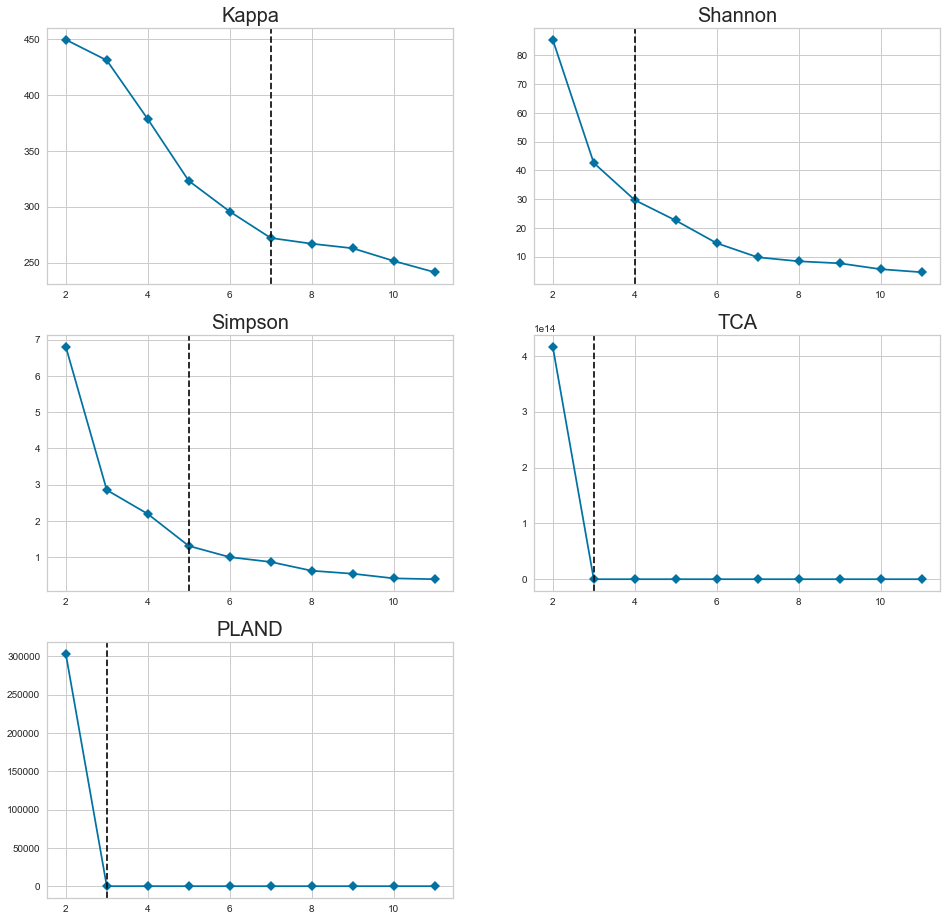

In [20]:
kappaclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_kappa)
shannonclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_shan)
simpsonclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_simp)
tcaclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_tca)
plandclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_pland)

fig = plt.figure(figsize=(16, 16))

plt.subplot(3, 2, 1)
plt.title('Kappa', fontsize=20)
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(kappaclustering, k=(2,12), timings=False)
_ = visualizer.fit(dist_kappa)        # Fit the data to the visualizer

plt.subplot(3, 2, 2)
plt.title('Shannon', fontsize=20)
visualizer = KElbowVisualizer(shannonclustering, k=(2,12), timings=False)
_ = visualizer.fit(dist_shan) 

plt.subplot(3, 2, 3)
plt.title('Simpson', fontsize=20)
visualizer = KElbowVisualizer(simpsonclustering, k=(2,12), timings=False)
_ = visualizer.fit(dist_simp) 

plt.subplot(3, 2, 4)
plt.title('TCA', fontsize=20)
visualizer = KElbowVisualizer(shannonclustering, k=(2,12), timings=False)
_ = visualizer.fit(dist_tca) 

plt.subplot(3, 2, 5)
plt.title('PLAND', fontsize=20)
visualizer = KElbowVisualizer(simpsonclustering, k=(2,12), timings=False)
_ = visualizer.fit(dist_pland) 


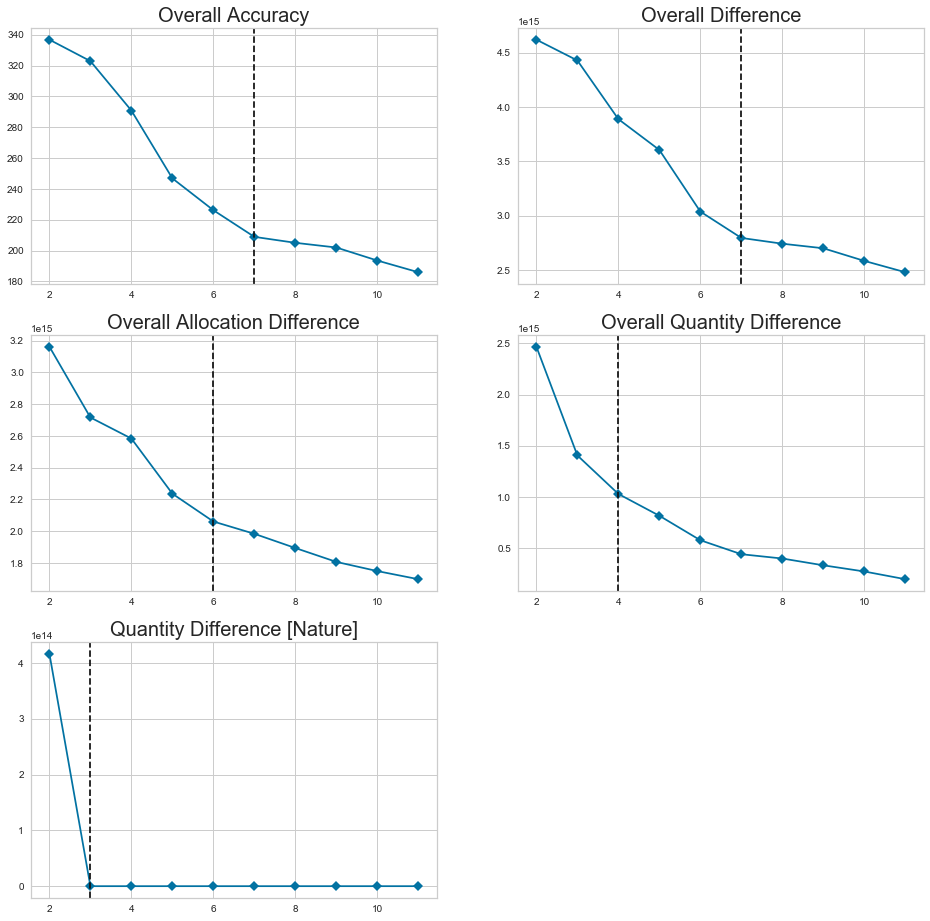

In [28]:
oaclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_oa)
odclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(od_df)
oadclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(oad_df)
oqdclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(oqd_df)
qd22clustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(qd22_df)

fig = plt.figure(figsize=(16, 16))

plt.subplot(3, 2, 1)
plt.title('Overall Accuracy', fontsize=20)
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(oaclustering, k=(2,12), timings=False)
_ = visualizer.fit(dist_oa)        # Fit the data to the visualizer

plt.subplot(3, 2, 2)
plt.title('Overall Difference', fontsize=20)
visualizer = KElbowVisualizer(odclustering, k=(2,12), timings=False)
_ = visualizer.fit(od_df) 

plt.subplot(3, 2, 3)
plt.title('Overall Allocation Difference', fontsize=20)
visualizer = KElbowVisualizer(oadclustering, k=(2,12), timings=False)
_ = visualizer.fit(oad_df) 

plt.subplot(3, 2, 4)
plt.title('Overall Quantity Difference', fontsize=20)
visualizer = KElbowVisualizer(oqdclustering, k=(2,12), timings=False)
_ = visualizer.fit(oqd_df) 

plt.subplot(3, 2, 5)
plt.title('Quantity Difference [Nature]', fontsize=20)
visualizer = KElbowVisualizer(qd22clustering, k=(2,12), timings=False)
_ = visualizer.fit(qd22_df) 

In [30]:
"""Cluster again with the found number of clusters"""
kappaclusters = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage='complete').fit(dist_kappa)
shannonclusters = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_shan)
simpsonclusters = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete').fit(dist_simp)
tcaclusters = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(dist_tca)
plandclusters = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(dist_pland)
oaclusters = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage='complete').fit(dist_oa)
odclusters = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage='complete').fit(od_df)
oadclusters = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage='complete').fit(oad_df)
oqdclusters = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(oqd_df)
qd22clusters = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(qd22_df)
labels_kappa = kappaclusters.labels_
labels_shan = shannonclusters.labels_
labels_simp = simpsonclusters.labels_
labels_tca = tcaclusters.labels_
labels_pland = plandclusters.labels_
labels_oa = oaclusters.labels_
labels_od = odclusters.labels_
labels_oad = oadclusters.labels_
labels_oqd = oqdclusters.labels_
labels_qd22 = qd22clusters.labels_

In [46]:
kappaclusters4 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_kappa)

In [36]:
"""Silhouette score to test number of clusters validity"""
sil_kappa = metrics.silhouette_score(dist_kappa, labels_kappa, metric='euclidean')
sil_shan = metrics.silhouette_score(dist_shan, labels_shan, metric='euclidean')
sil_simp = metrics.silhouette_score(dist_simp, labels_simp, metric='euclidean')
sil_tca = metrics.silhouette_score(dist_tca, labels_shan, metric='euclidean')
sil_pland = metrics.silhouette_score(dist_pland, labels_simp, metric='euclidean')
sil_oa = metrics.silhouette_score(dist_oa, labels_oa, metric='euclidean')
sil_od = metrics.silhouette_score(od_df, labels_od, metric='euclidean')
sil_oad = metrics.silhouette_score(oad_df, labels_oad, metric='euclidean')
sil_oqd = metrics.silhouette_score(oqd_df, labels_oqd, metric='euclidean')
sil_qd22 = metrics.silhouette_score(qd22_df, labels_qd22, metric='euclidean')
print(f'Kappa score is {sil_kappa:.3f}\nShannon score is {sil_shan:.3f}\nSimpson score is {sil_simp:.3f}\nTCA score is {sil_tca:.3f}\
    \nPLAND score is {sil_pland:.3f}\nOverall accuracy score is {sil_oa:.3f}\nOverall Difference score is {sil_od:.3f}\nOverall Allocation Difference score is {sil_oad:.3f}\
    \nOverall Quantity Difference score is {sil_oqd:.3f}\nQuantity Difference [Nature] score is {sil_qd22:.3f}')

Kappa score is 0.227
Shannon score is 0.502
Simpson score is 0.517
TCA score is -0.025    
PLAND score is -0.128
Overall accuracy score is 0.215
Overall Difference score is 0.226
Overall Allocation Difference score is 0.233    
Overall Quantity Difference score is 0.499
Quantity Difference [Nature] score is 1.000


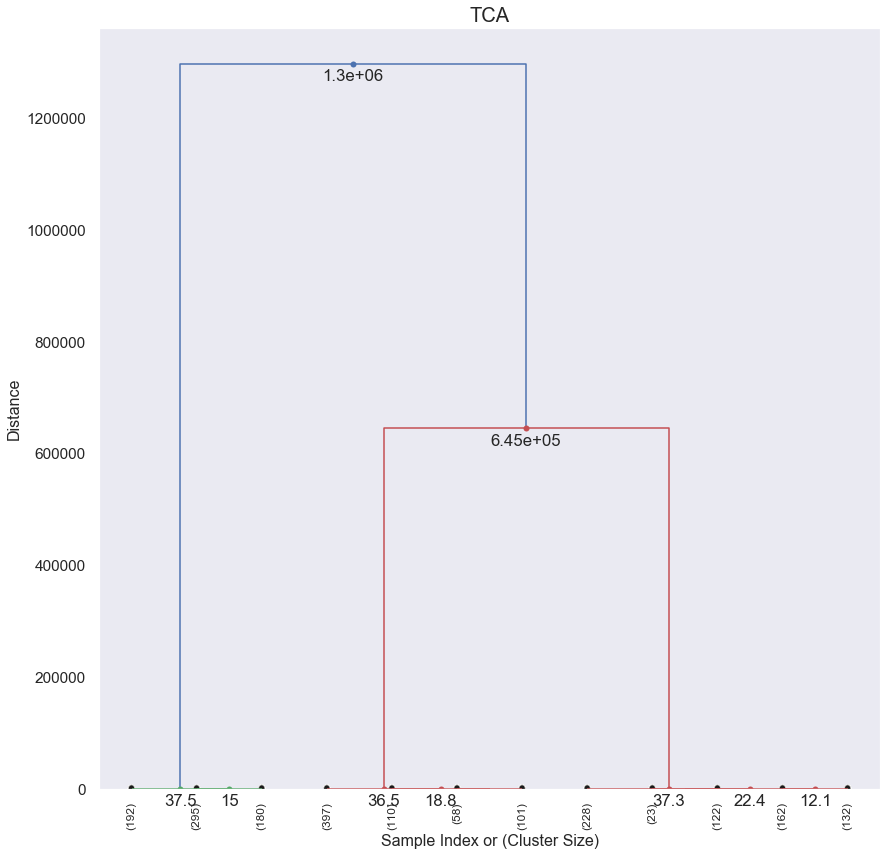

In [42]:
fig = plt.figure(figsize=(14, 14))
# Kappa Standard
# Turn distance matrix into condensed form
tca_condensed = squareform(dist_tca)

fancy_dendrogram(
    sch.linkage(tca_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_kappa = plt.gca()
ax_kappa.grid(False)
plt.title('TCA', fontsize=20)
plt.ylabel('Distance', fontsize=16)
plt.savefig('E:/thesis_images/dendrohm_TCA.png', format='png', bbox_inches='tight')

## Compute the CMs

In [23]:
"""Have to add a label when calling the cm function when the number of clusters between 
metrics is uneven or it won't properly generate the later clusters
"""
labels=[0, 1, 2, 3, 4, 5, 6]
cm_kappashan = confusion_matrix(labels_kappa, labels_shan, labels=labels)

In [24]:
rows_cols = ['cluster' + str(i + 1) for i in range(7)]

In [25]:
np.unique(labels_kappa, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([161, 263, 283, 361, 261,  79, 592], dtype=int64))

In [26]:
cm_kappashan

array([[104,   2,  55,   0,   0,   0,   0],
       [ 32, 101, 106,  24,   0,   0,   0],
       [177,   1, 105,   0,   0,   0,   0],
       [ 47, 122, 158,  34,   0,   0,   0],
       [113,  15, 133,   0,   0,   0,   0],
       [ 28,   5,  46,   0,   0,   0,   0],
       [  1, 266, 216, 109,   0,   0,   0]], dtype=int64)

In [27]:
df = pd.DataFrame(data=cm_kappashan, index=rows_cols, columns=rows_cols)

In [28]:
pont.pontiPy(df).matrix()

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,Sum,Row Disagreement
cluster1,104,2,55,0,0,0,0,161,57
cluster2,32,101,106,24,0,0,0,263,162
cluster3,177,1,105,0,0,0,0,283,178
cluster4,47,122,158,34,0,0,0,361,327
cluster5,113,15,133,0,0,0,0,261,261
cluster6,28,5,46,0,0,0,0,79,79
cluster7,1,266,216,109,0,0,0,592,592
Sum,502,512,819,167,0,0,0,2000,1656
Column Disagreement,398,411,714,133,0,0,0,1656,


## Visualize the CMs

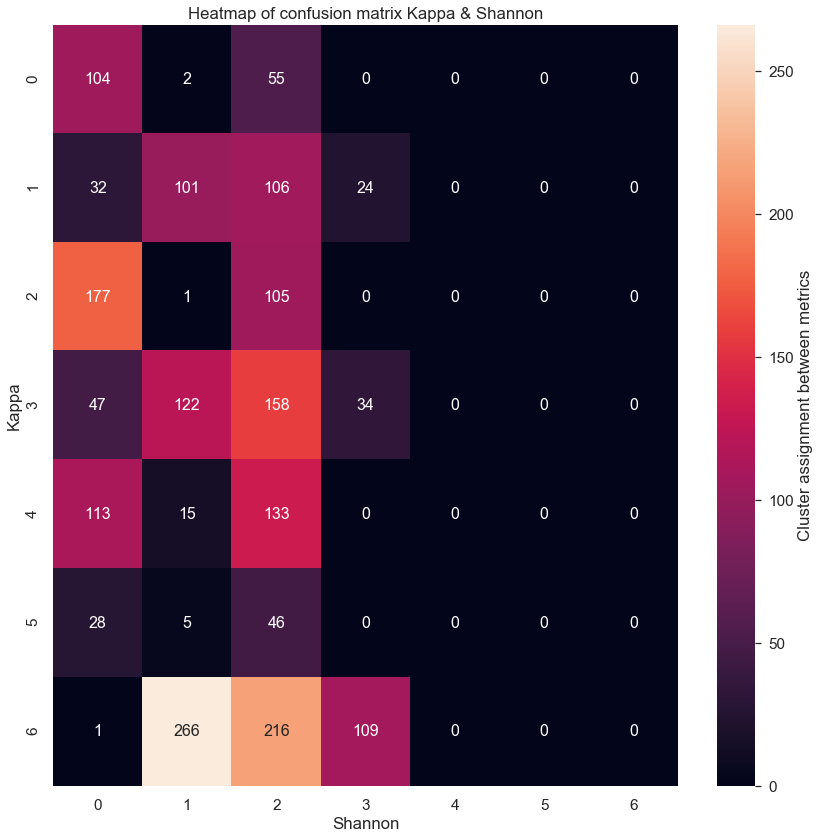

<Figure size 432x288 with 0 Axes>

In [45]:
plt.figure(figsize=(14,14))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_kappashan, annot=True, annot_kws={"size": 16}, fmt='d' \
            , cbar_kws={'label': 'Cluster assignment between metrics'}) # font size
plt.title('Heatmap of confusion matrix Kappa & Shannon')
plt.ylabel('Kappa')
plt.xlabel('Shannon')

plt.show()
plt.savefig('E:/thesis_images/cm_kappashan_orig.png', format='png', bbox_inches='tight')

In [49]:
labels_kappa4 = kappaclusters4.labels_
cm_kappashan_same = confusion_matrix(labels_kappa4, labels_shan)

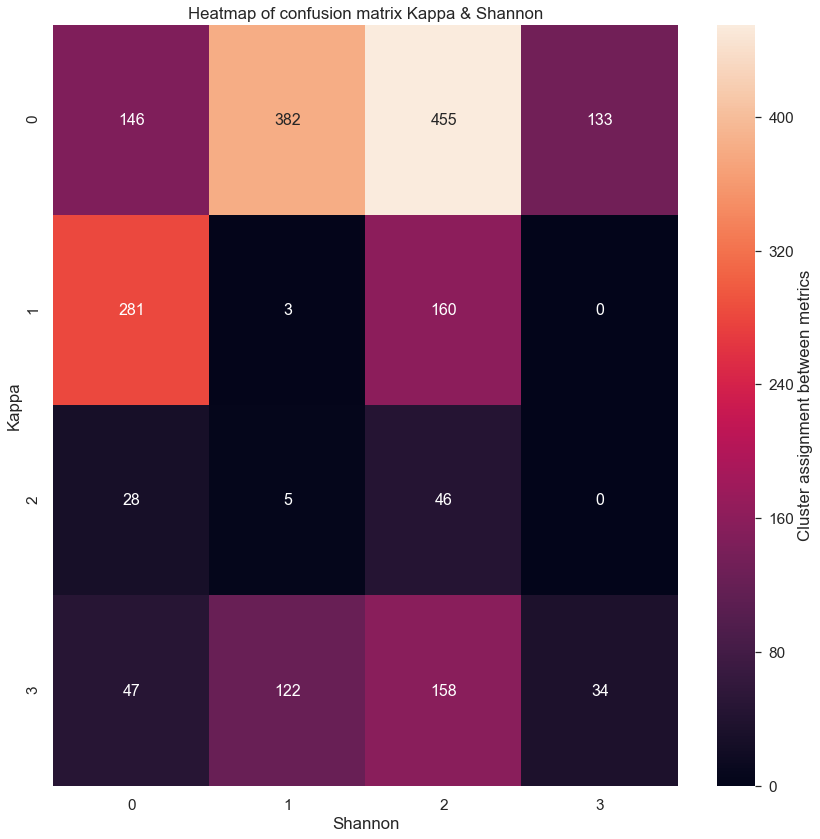

<Figure size 432x288 with 0 Axes>

In [52]:
"""CM when both metrics have 4 clusters"""
plt.figure(figsize=(14,14))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_kappashan_same, annot=True, annot_kws={"size": 16}, fmt='d' \
            , cbar_kws={'label': 'Cluster assignment between metrics'}) # font size
plt.title('Heatmap of confusion matrix Kappa & Shannon')
plt.ylabel('Kappa')
plt.xlabel('Shannon')

plt.show()
plt.savefig('E:/thesis_images/cm_kappashan_orig.png', format='png', bbox_inches='tight')

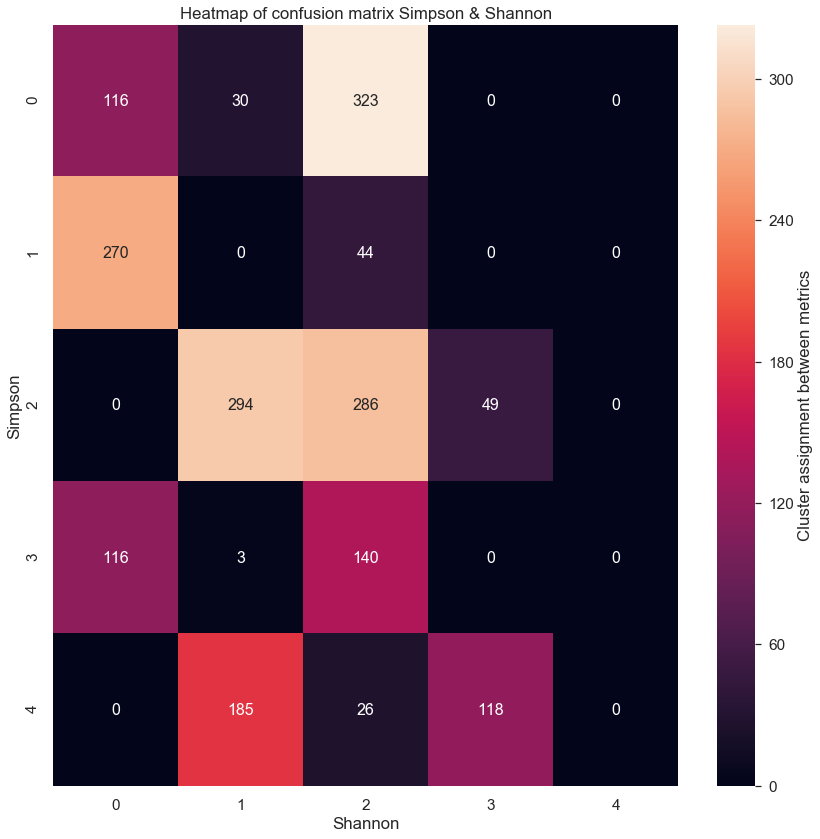

In [64]:
"""Simpson and Shannon"""
"""CM when both metrics use their own nr of clusters"""
cm_simpshan = confusion_matrix(labels_simp, labels_shan)
plt.figure(figsize=(14,14))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_simpshan, annot=True, annot_kws={"size": 16}, fmt='d' \
            , cbar_kws={'label': 'Cluster assignment between metrics'}) # font size
plt.title('Heatmap of confusion matrix Simpson & Shannon')
plt.ylabel('Simpson')
plt.xlabel('Shannon')
plt.savefig('E:/thesis_images/cm_simpshan_orig.png', format='png', bbox_inches='tight')
plt.show()

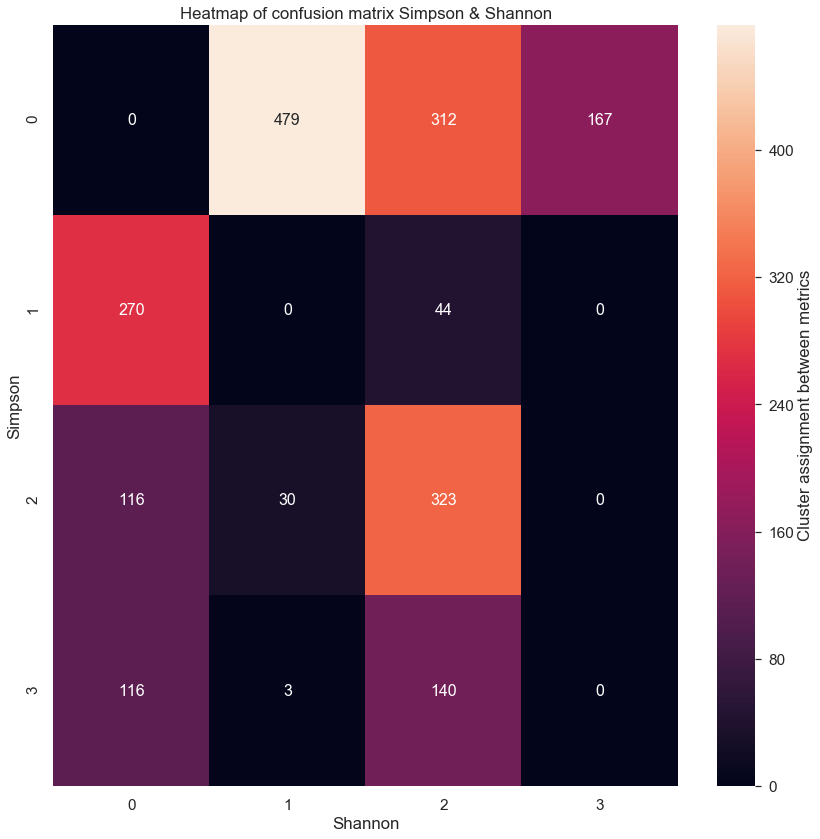

In [69]:
"""Simpson and Shannon"""
"""CM when both metrics have 4 clusters"""
simpsonclusters4 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_simp)
labels_simp4 = simpsonclusters4.labels_
cm_simpshan4 = confusion_matrix(labels_simp4, labels_shan)
plt.figure(figsize=(14,14))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_simpshan4, annot=True, annot_kws={"size": 16}, fmt='d' \
            , cbar_kws={'label': 'Cluster assignment between metrics'}) # font size
plt.title('Heatmap of confusion matrix Simpson & Shannon')
plt.ylabel('Simpson')
plt.xlabel('Shannon')
plt.savefig('E:/thesis_images/cm_simpshan_same.png', format='png', bbox_inches='tight')
plt.show()

In [71]:
rows_cols5 = ['cluster' + str(i) for i in range(5)]
df_simpshan = pd.DataFrame(data=cm_simpshan, index=rows_cols5, columns=rows_cols5)
pont.pontiPy(df_simpshan).matrix()

,cluster0,cluster1,cluster2,cluster3,cluster4,Sum,Row Disagreement
cluster0,116,30,323,0,0,469,353
cluster1,270,0,44,0,0,314,314
cluster2,0,294,286,49,0,629,343
cluster3,116,3,140,0,0,259,259
cluster4,0,185,26,118,0,329,329
Sum,502,512,819,167,0,2000,1598
Column Disagreement,386,512,533,167,0,1598,


In [72]:
rows_cols5 = ['cluster' + str(i) for i in range(4)]
df_simpshan4 = pd.DataFrame(data=cm_simpshan4, index=rows_cols5, columns=rows_cols5)
pont.pontiPy(df_simpshan4).matrix()

,cluster0,cluster1,cluster2,cluster3,Sum,Row Disagreement
cluster0,0,479,312,167,958,958
cluster1,270,0,44,0,314,314
cluster2,116,30,323,0,469,146
cluster3,116,3,140,0,259,259
Sum,502,512,819,167,2000,1677
Column Disagreement,502,512,496,167,1677,


# Test fancy heatmap+dendrogram

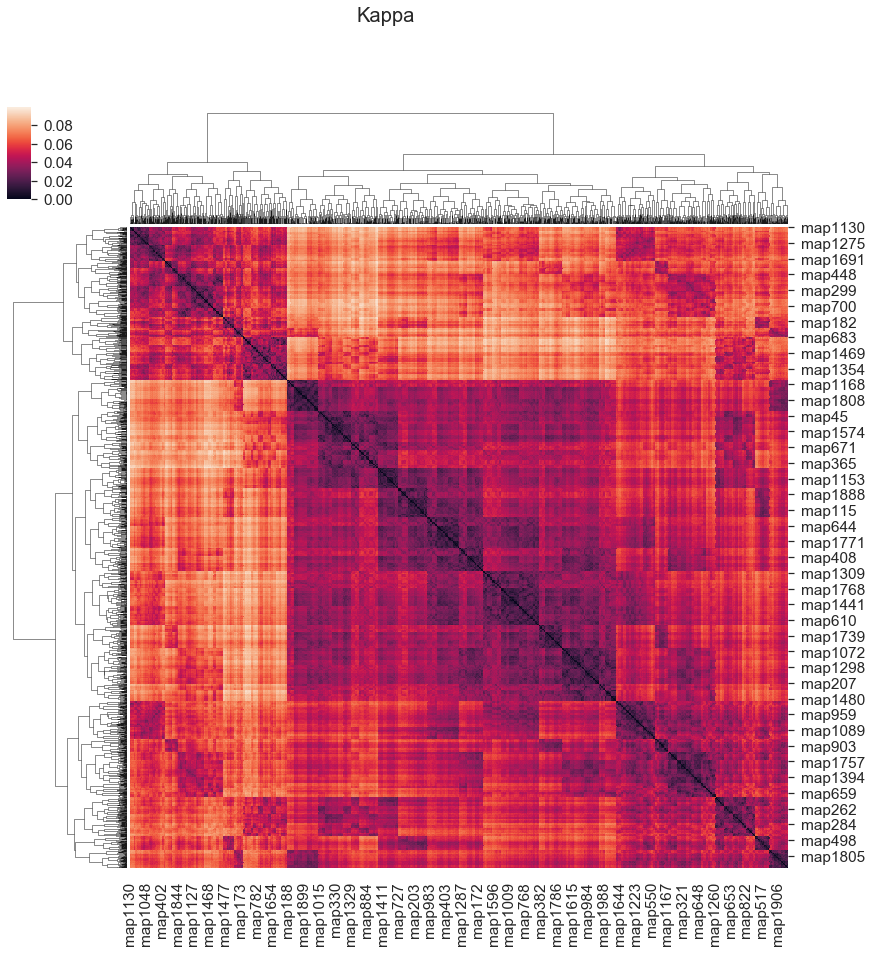

In [58]:
sns.clustermap(dist_kappa, figsize=(14,14)).fig.suptitle('Kappa') 
plt.savefig('E:/thesis_images/dendrohm_kappa.png', format='png', bbox_inches='tight')

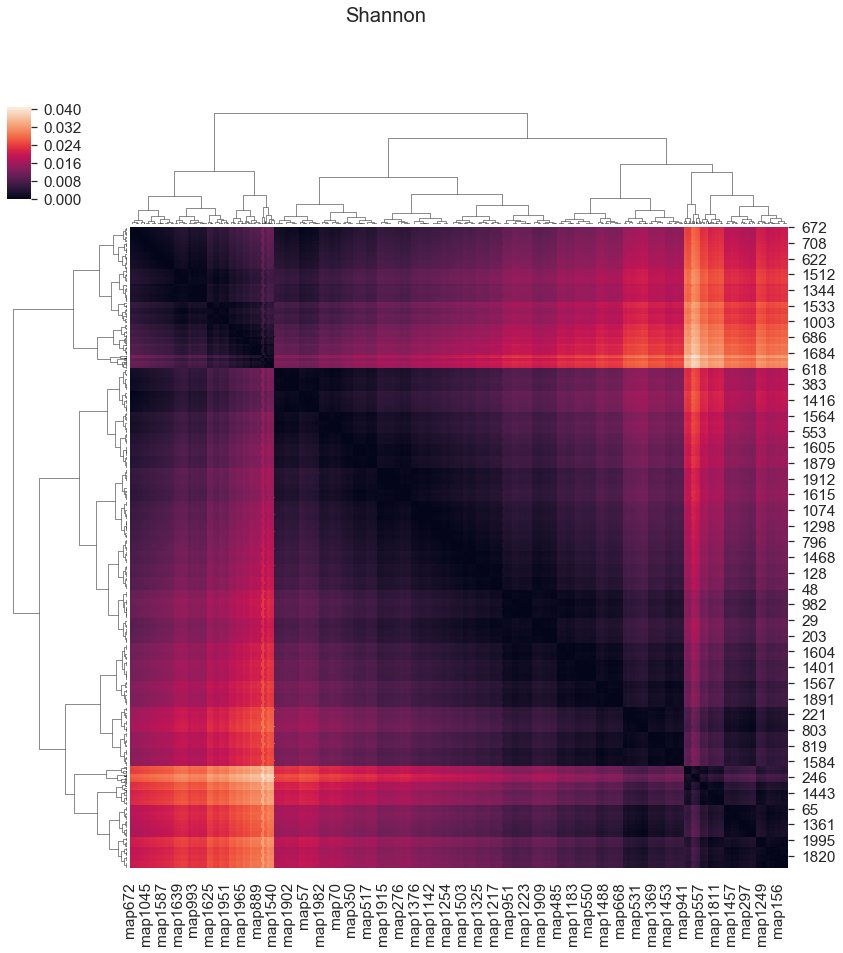

In [59]:
sns.clustermap(dist_shan, figsize=(14,14)).fig.suptitle('Shannon') 
plt.savefig('E:/thesis_images/dendrohm_shan.png', format='png', bbox_inches='tight')

# Kappa

In [ ]:
df_kappa = kappa_df.astype(float).round(decimals=3)
kappa_dist = 1 - df_kappa
kappa_dist[kappa_dist < 0] = 0
kappa_dist.head(10)

In [ ]:
kappaclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(kappa_dist)

In [ ]:
_ = plt.figure(figsize=(12,8)) 
_ = sns.heatmap(kappa_dist)
_ = plt.title("Kappa Heatmap 100 Maps", fontsize =20)

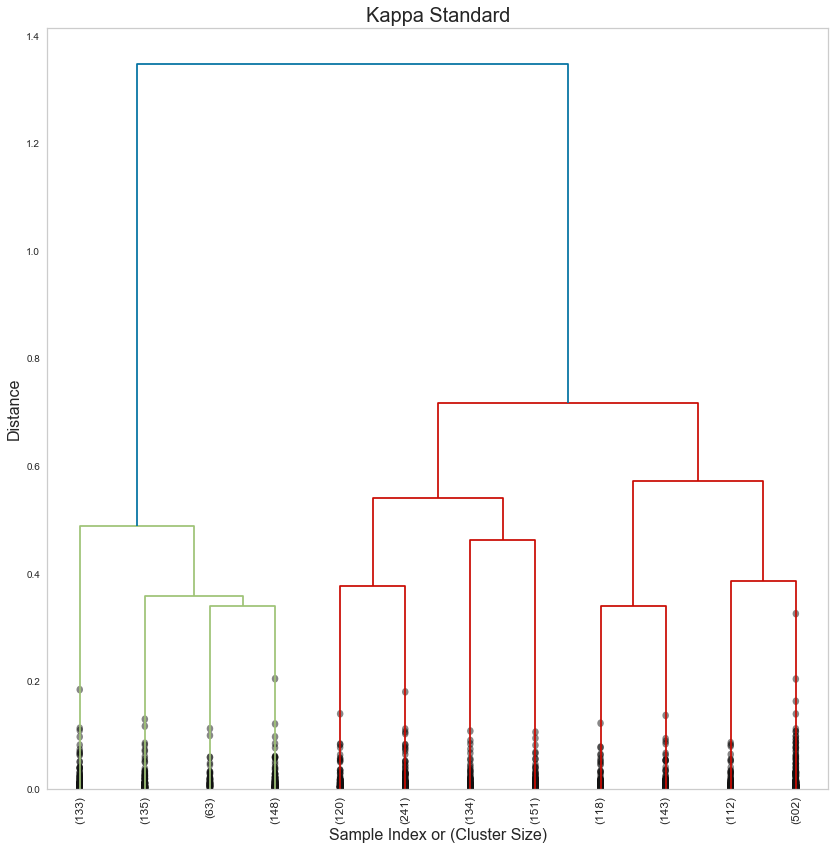

In [41]:
fig = plt.figure(figsize=(14, 14))
# Kappa Standard
# Turn distance matrix into condensed form
kappa_condensed = squareform(dist_kappa)

fancy_dendrogram(
    sch.linkage(kappa_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_kappa = plt.gca()
ax_kappa.grid(False)
plt.title('Kappa Standard', fontsize=20)
plt.ylabel('Distance', fontsize=16)
plt.savefig('E:/thesis_images/kappa_dendro.png', format='png', bbox_inches='tight')

In [ ]:
visualizer = KElbowVisualizer(kappaclustering, k=(2,12), timings=False)
_ = visualizer.fit(kappa_dist)        # Fit the data to the visualizer

# Shannon's

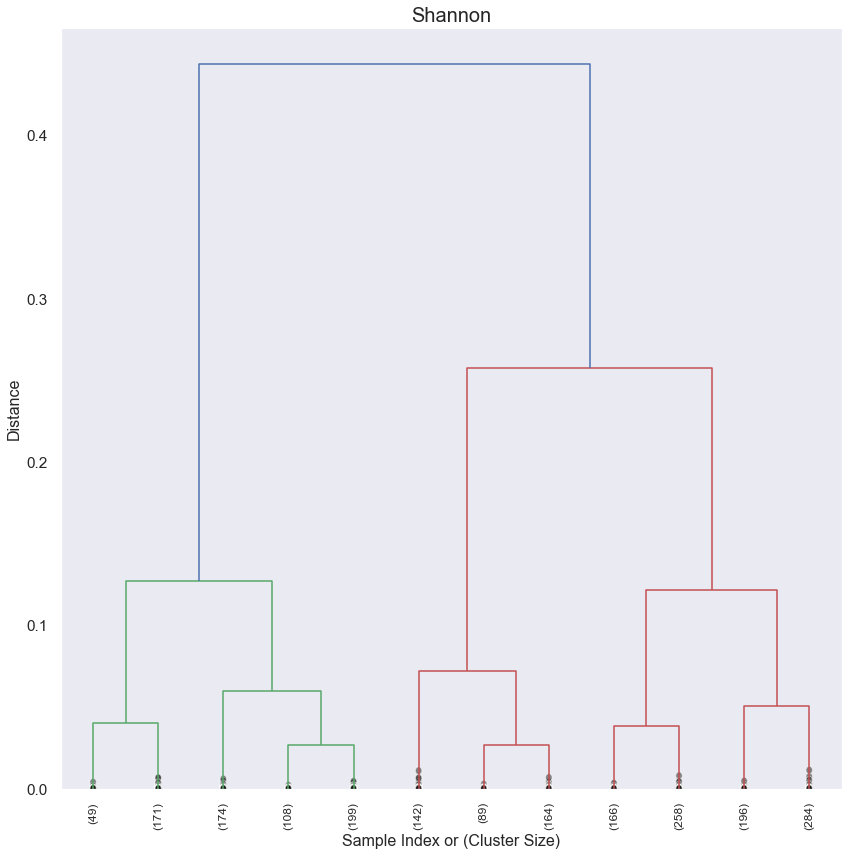

In [55]:
fig = plt.figure(figsize=(14, 14))
# Kappa Standard
# Turn distance matrix into condensed form
shan_condensed = squareform(dist_shan)

fancy_dendrogram(
    sch.linkage(shan_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_shan = plt.gca()
ax_shan.grid(False)
plt.title('Shannon', fontsize=20)
plt.ylabel('Distance', fontsize=16)
plt.savefig('E:/thesis_images/shan_dendro.png', format='png', bbox_inches='tight')

# Overall Accuracy

In [43]:
kappa_condensed

array([0.07212498, 0.05748942, 0.06810319, ..., 0.07797271, 0.05929555,
       0.06277243])

In [39]:
oa_condensed

array([0.062, 0.05 , 0.059, ..., 0.068, 0.051, 0.054])

Text(0, 0.5, 'Distance')

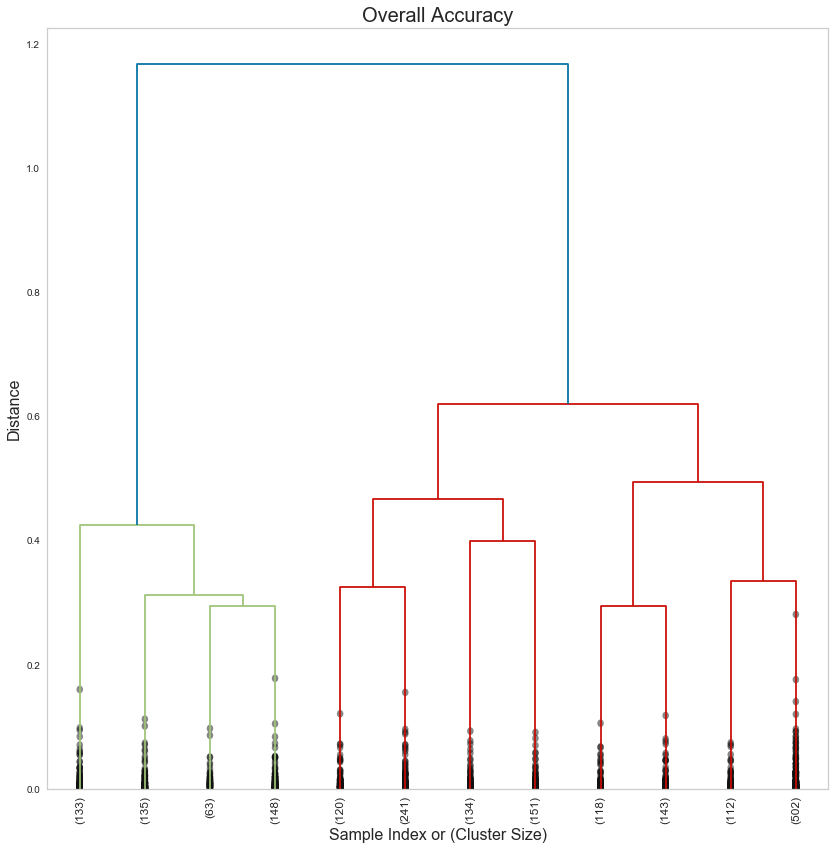

In [38]:
fig = plt.figure(figsize=(14, 14))

oa_condensed = squareform(dist_oa)

fancy_dendrogram(
    sch.linkage(oa_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_oa = plt.gca()
ax_oa.grid(False)
plt.title('Overall Accuracy', fontsize=20)
plt.ylabel('Distance', fontsize=16)
#plt.savefig('E:/thesis_images/shan_dendro.png', format='png', bbox_inches='tight')

# OD

Text(0, 0.5, 'Distance')

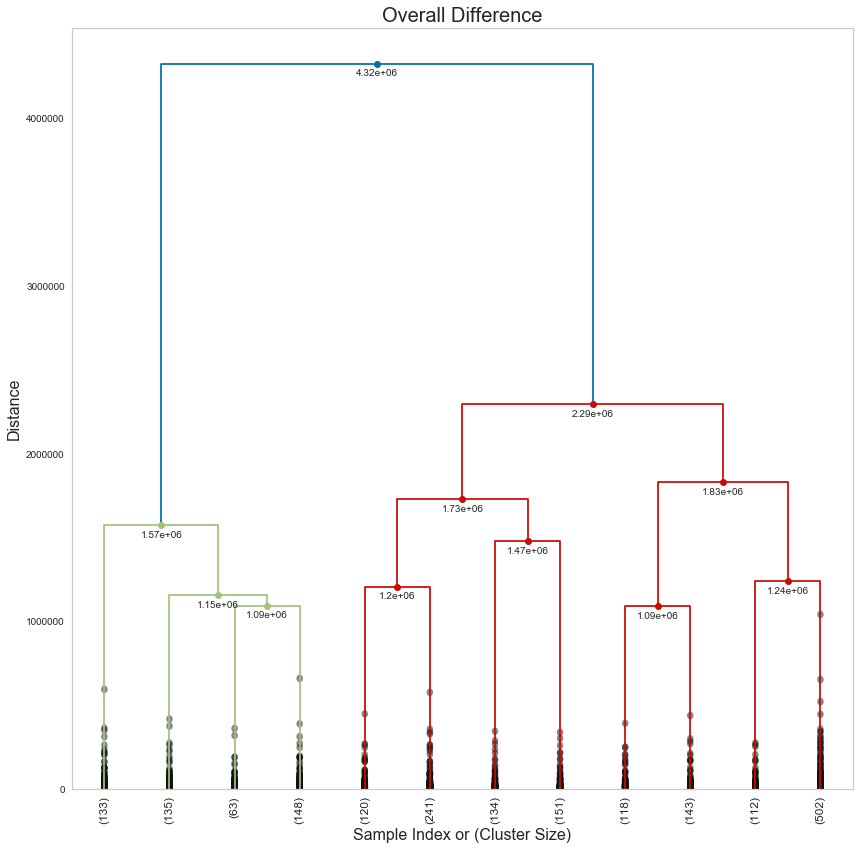

In [46]:
fig = plt.figure(figsize=(14, 14))

od_condensed = squareform(od_df)

fancy_dendrogram(
    sch.linkage(od_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_od = plt.gca()
ax_od.grid(False)
plt.title('Overall Difference', fontsize=20)
plt.ylabel('Distance', fontsize=16)
#plt.savefig('E:/thesis_images/shan_dendro.png', format='png', bbox_inches='tight')

# Overall Allocation Difference

Text(0, 0.5, 'Distance')

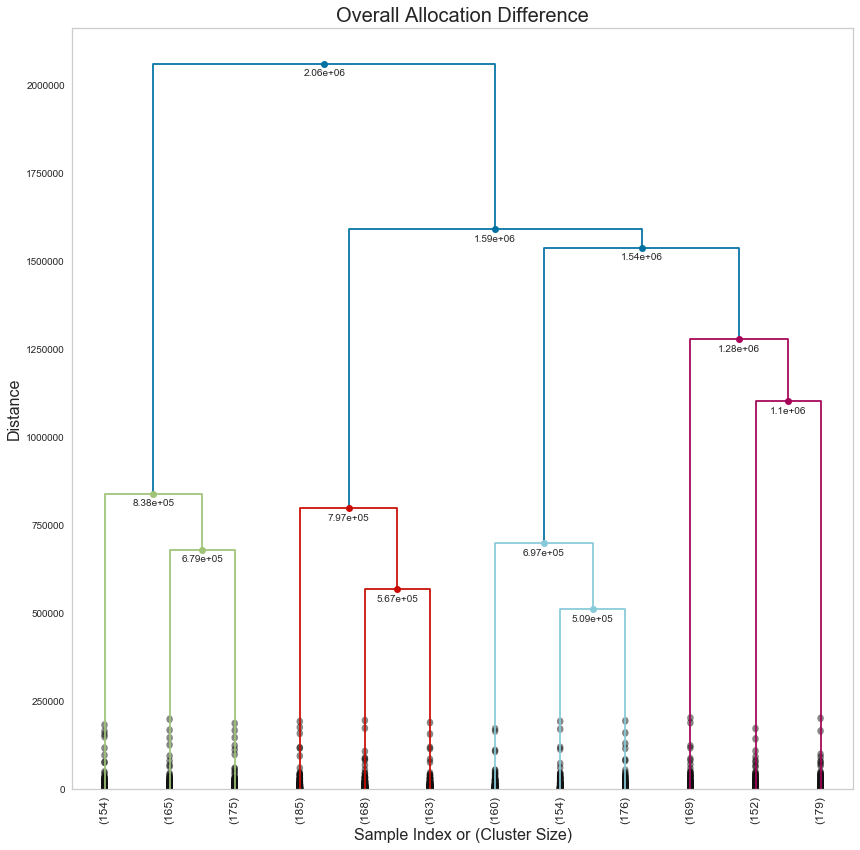

In [47]:
fig = plt.figure(figsize=(14, 14))

oad_condensed = squareform(oad_df)

fancy_dendrogram(
    sch.linkage(oad_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_od = plt.gca()
ax_od.grid(False)
plt.title('Overall Allocation Difference', fontsize=20)
plt.ylabel('Distance', fontsize=16)
#plt.savefig('E:/thesis_images/shan_dendro.png', format='png', bbox_inches='tight')

# Overall Quantity Difference

Text(0, 0.5, 'Distance')

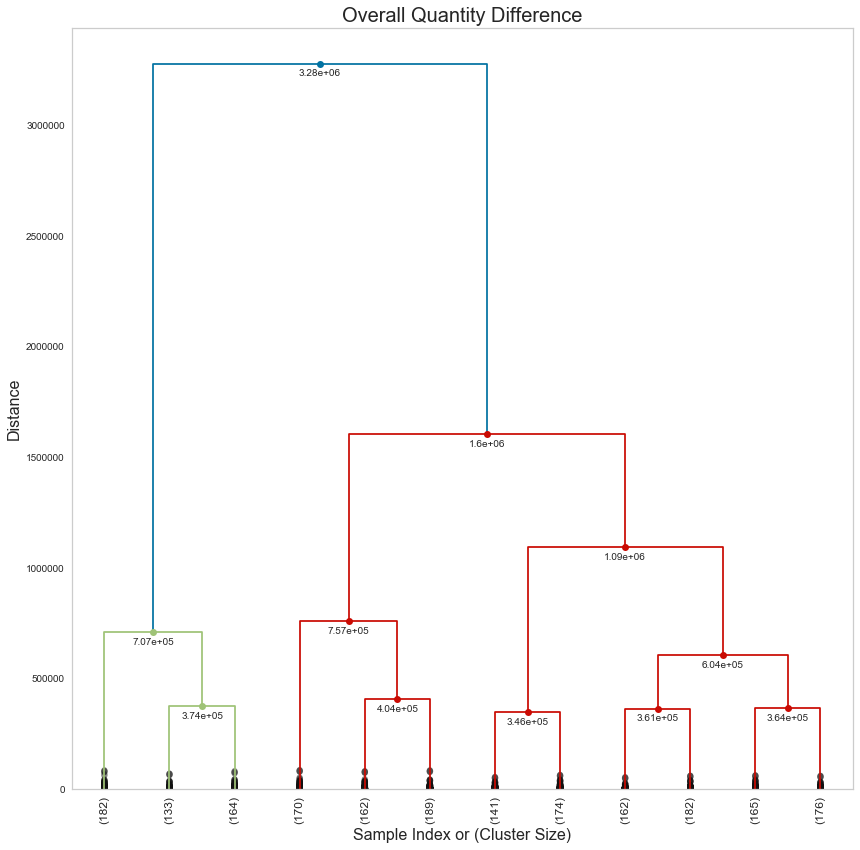

In [55]:
fig = plt.figure(figsize=(14, 14))

oqd_condensed = squareform(oqd_df)

fancy_dendrogram(
    sch.linkage(oqd_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_od = plt.gca()
ax_od.grid(False)
plt.title('Overall Quantity Difference', fontsize=20)
plt.ylabel('Distance', fontsize=16)

In [ ]:
plt.subplot(3, 2, 1)

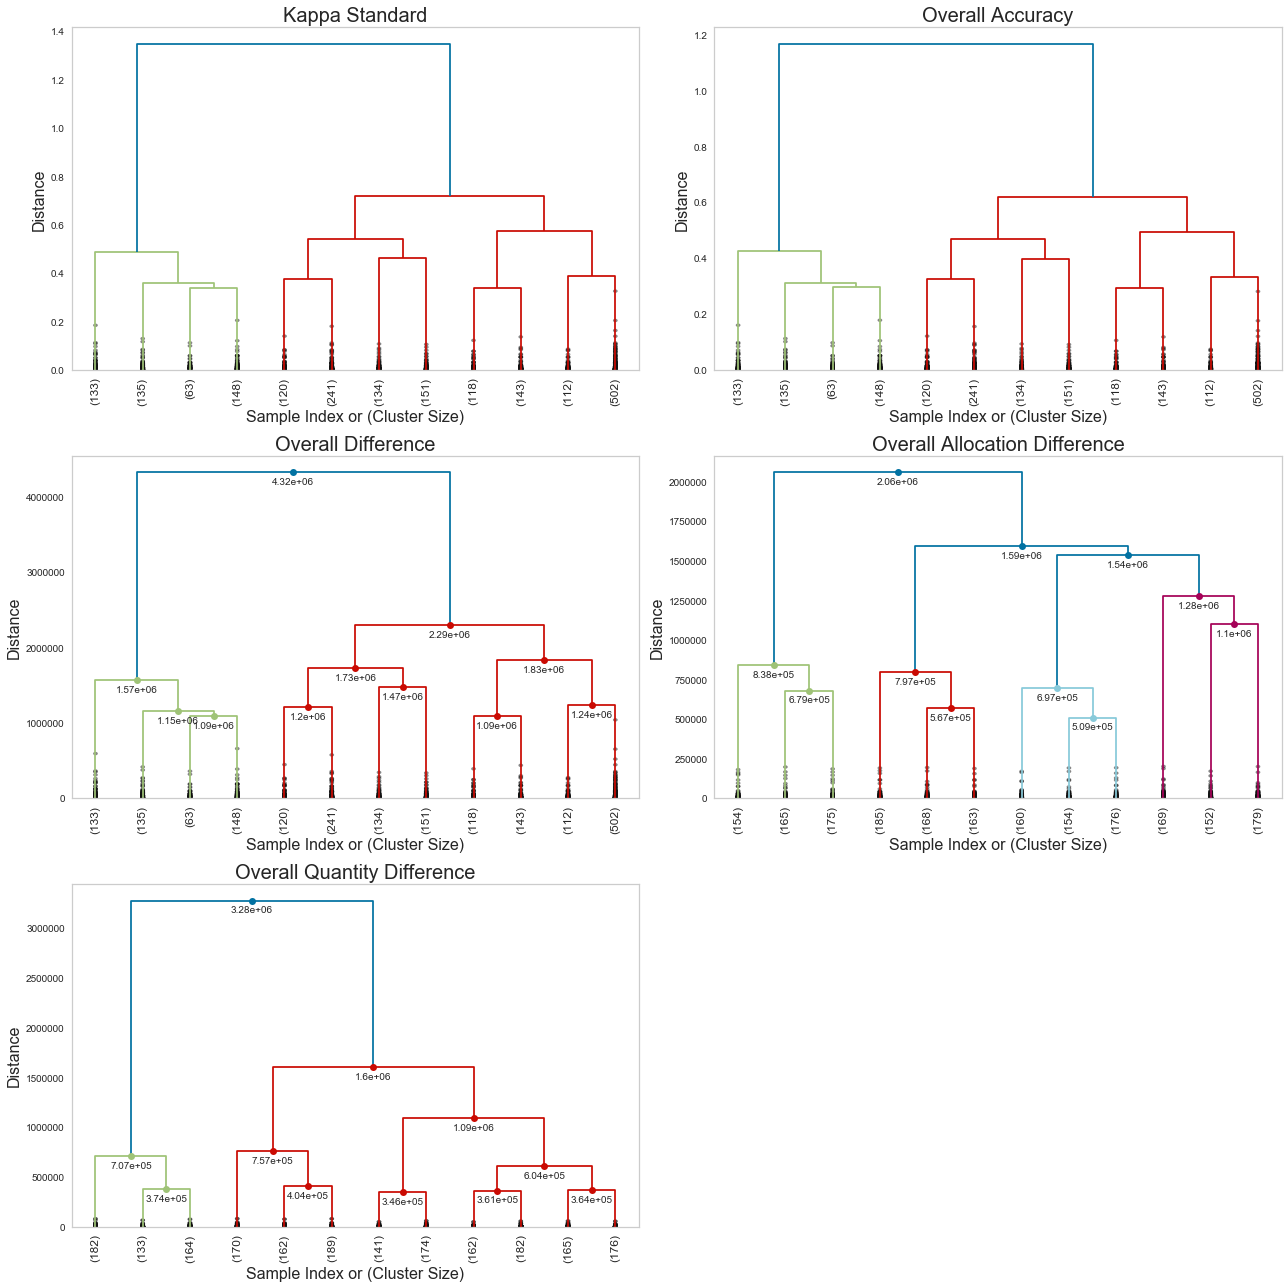

In [56]:
fig = plt.figure(figsize=(18, 18))
# Kappa Standard
# Turn distance matrix into condensed form
plt.subplot(3, 2, 1)
kappa_condensed = squareform(dist_kappa)

fancy_dendrogram(
    sch.linkage(kappa_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_kappa = plt.gca()
ax_kappa.grid(False)
plt.title('Kappa Standard', fontsize=20)
plt.ylabel('Distance', fontsize=16)

plt.subplot(3, 2, 2)
oa_condensed = squareform(dist_oa)

fancy_dendrogram(
    sch.linkage(oa_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_oa = plt.gca()
ax_oa.grid(False)
plt.title('Overall Accuracy', fontsize=20)
plt.ylabel('Distance', fontsize=16)

plt.subplot(3, 2, 3)
od_condensed = squareform(od_df)

fancy_dendrogram(
    sch.linkage(od_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_od = plt.gca()
ax_od.grid(False)
plt.title('Overall Difference', fontsize=20)
plt.ylabel('Distance', fontsize=16)

plt.subplot(3, 2, 4)
oad_condensed = squareform(oad_df)

fancy_dendrogram(
    sch.linkage(oad_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_od = plt.gca()
ax_od.grid(False)
plt.title('Overall Allocation Difference', fontsize=20)
plt.ylabel('Distance', fontsize=16)

plt.subplot(3, 2, 5)
oqd_condensed = squareform(oqd_df)

fancy_dendrogram(
    sch.linkage(oqd_condensed, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10 # useful in small plots so annotations don't overlap
)
ax_od = plt.gca()
ax_od.grid(False)
plt.title('Overall Quantity Difference', fontsize=20)
plt.ylabel('Distance', fontsize=16)

plt.tight_layout()